# Marching On Together: A FIFA Player Data Analysis

by Noel McCann

<img src="https://i.redd.it/gukpe1e9qeg31.jpg" length="50px" width="500px">

# Dataset Overview

The data set I am using is the player dataset used for the video game FIFA 20 (https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset). It was the 2020-2021 installment in Electronic Arts' soccer game franchise that has been running since December 13, 1993. Since its humble origins on Super Nintendo and Sega Genesis, the series has since sold over 260 million copies (https://www.gamesindustry.biz/articles/2018-09-05-fifa-18-sells-over-24-million-copies). FIFA 20, in particular, has been released on PS4, Xbox One, Nintendo Switch, and PC and features clubs from 48 licensed leagues.

Each row contains a player logged into the game's dataset, and each column shows his or her attributes. In addition to physical attributes such as a player's weight and height, the game has attributes that determine how skilled they are in terms of ball control, passing, shooting, and defending. Moreover, there are columns that show their current club, transfer value, and weekly wages, all of which will be important factors when choosing the right player for a team.

In English soccer, the Premier League serves as the major league, while the English Football League's (EFL) Championship, League One, and League Two serve as the three professional minor leagues. At the end of every season, the 3 best performing clubs in the EFL Championship get promoted to the Premier League. However, the bottom three teams in the Premier League get relegated (demoted) to the Championship. This project's purpose will be focusing on Leeds United, a club that got promoted in the 2019-2020 Championship, and making decisions that will help them stay in the Premier League.

# Cleaning Up Data

After suffering from financial mismanagement and poor ownership decisions, Leeds United was sent down to the EFL Championship in 2004. Sixteen years later, the club have finally been promoted back to the Premier League. But in order to help them stay there, we're going to need to first install the Basic Libraries and load the dataset.

In [1]:
# Basics
import numpy as np
import pandas as pd 

# For Visualizations & Machine Learning
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('players_20.csv')
data.columns = ['sofifa_id','player_url','short_name','long_name','age','dob','height_cm','weight_kg','nationality',
                'club','overall','potential','value_eur','wage_eur','player_positions','preferred_foot',
                'international_reputation','weak_foot','skill_moves','work_rate','body_type','real_face',
                'release_clause_eur','player_tags','team_position','team_jersey_number','loaned_from','joined',
                'contract_valid_until','nation_position','nation_jersey_number','pace','shooting','passing','dribbling','defending','physic',
                'gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning','player_traits','attacking_crossing','attacking_finishing','attacking_heading_accuracy',
                'attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy',
                'skill_long_passing','skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility',
                'movement_reactions','movement_balance','power_shot_power','power_jumping','power_stamina','power_strength',
                'power_long_shots','mentality_aggression','mentality_interceptions','mentality_positioning','mentality_vision',
                'mentality_penalties','mentality_composure','defending_marking','defending_standing_tackle',
                'defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking',
                'goalkeeping_positioning','goalkeeping_reflexes',
                'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb']
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


The original data set contains 104 columns, many of which will not be necessary for our analysis. To ensure we have clean data to work with, we're gonna need to drop some columns that do not share meaningful information. We will also check for any null values and ensure any missing values are filled before continuing.

In [3]:
#Remove unneccesary columns
data.drop(['sofifa_id','player_url','long_name','dob','height_cm','weight_kg', 'preferred_foot', 'weak_foot','skill_moves', 'gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning','body_type','real_face','player_tags','team_jersey_number','joined','nation_position','nation_jersey_number',
           'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb',
                'attacking_crossing','attacking_finishing','attacking_heading_accuracy',
                'attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy',
                'skill_long_passing','skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility',
                'movement_reactions','movement_balance','power_shot_power','power_jumping','power_stamina','power_strength',
                'power_long_shots','mentality_aggression','mentality_interceptions','mentality_positioning','mentality_vision',
                'mentality_penalties','mentality_composure','defending_marking','defending_standing_tackle',
                'defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking',
                'goalkeeping_positioning','goalkeeping_reflexes','player_traits'], axis=1, inplace=True)
data.head()

,short_name,age,nationality,club,overall,potential,value_eur,wage_eur,player_positions,international_reputation,...,release_clause_eur,team_position,loaned_from,contract_valid_until,pace,shooting,passing,dribbling,defending,physic
0,L. Messi,32,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",5,...,195800000.0,RW,NaN,2021.0,87.0,92.0,92.0,96.0,39.0,66.0
1,Cristiano Ronaldo,34,Portugal,Juventus,93,93,58500000,405000,"ST, LW",5,...,96500000.0,LW,NaN,2022.0,90.0,93.0,82.0,89.0,35.0,78.0
2,Neymar Jr,27,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",5,...,195200000.0,CAM,NaN,2022.0,91.0,85.0,87.0,95.0,32.0,58.0
3,J. Oblak,26,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,3,...,164700000.0,GK,NaN,2023.0,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,28,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",4,...,184500000.0,LW,NaN,2024.0,91.0,83.0,86.0,94.0,35.0,66.0


In [4]:
#Best Positions
data['best_position'] = data['player_positions'].str.split(',').str[0]

In [5]:
# Checking for nulls

data.isnull().sum()

short_name                      0
age                             0
nationality                     0
club                            0
overall                         0
potential                       0
value_eur                       0
wage_eur                        0
player_positions                0
international_reputation        0
work_rate                       0
release_clause_eur           1298
team_position                 240
loaned_from                 17230
contract_valid_until          240
pace                         2036
shooting                     2036
passing                      2036
dribbling                    2036
defending                    2036
physic                       2036
best_position                   0
dtype: int64

In [6]:
# filling the missing value for the continous variables for proper data visualization
data['release_clause_eur'].fillna('0', inplace = True)
data['team_position'].fillna('ST', inplace = True)
data['contract_valid_until'].fillna(2020, inplace = True)
data['loaned_from'].fillna('None', inplace = True)
data.fillna(0, inplace = True)

# Reviewing Leeds United's Squad
Now that we've cleaned up our data and replaced the missing values, we can take a look at Leeds' squad. In addition to the players' names and position, we'll look at their overall ability, potential ability, basic attributes, age, and  weekly wages. Some players have also joined Leeds on loan (temporary players).

In [7]:
#Filtering for Leeds United
def club(x):
    return data[data['club'] == x][['short_name','age','best_position', 'overall','potential','pace','shooting','passing','dribbling','defending','physic','wage_eur',
                                    'loaned_from','contract_valid_until']]

club('Leeds United')

,short_name,age,best_position,overall,potential,pace,shooting,passing,dribbling,defending,physic,wage_eur,loaned_from,contract_valid_until
1484,Pablo Hernández,34,RM,76,76,70.0,73.0,76.0,78.0,46.0,60.0,57000,None,2020.0
1699,K. Phillips,23,CDM,75,81,67.0,66.0,69.0,68.0,72.0,83.0,43000,None,2021.0
1935,Kiko Casilla,32,GK,75,75,0.0,0.0,0.0,0.0,0.0,0.0,40000,None,2023.0
2305,Hélder Costa,25,RM,74,77,85.0,67.0,68.0,78.0,30.0,59.0,48000,Wolverhampton Wanderers,2020.0
2342,L. Cooper,27,CB,74,75,51.0,35.0,54.0,58.0,74.0,77.0,46000,None,2021.0
3126,M. Klich,29,CM,73,73,59.0,70.0,72.0,71.0,56.0,71.0,49000,None,2020.0
3163,B. Douglas,29,LB,73,73,68.0,64.0,75.0,68.0,69.0,67.0,44000,None,2021.0
3486,P. Bamford,25,ST,72,76,71.0,69.0,63.0,71.0,35.0,68.0,43000,None,2022.0
3620,L. Ayling,27,RB,72,73,69.0,50.0,61.0,68.0,72.0,75.0,37000,None,2021.0
3626,A. Forshaw,27,CM,72,73,65.0,61.0,71.0,72.0,62.0,66.0,41000,None,2022.0


In [8]:
# Position Quality Check
club('Leeds United')[['best_position','overall','pace','shooting','passing','dribbling','defending','physic']].groupby('best_position').mean()

,overall,pace,shooting,passing,dribbling,defending,physic
best_position,,,,,,,
CAM,66.00,77.000000,63.500000,60.00,69.0,31.000000,63.500000
CB,69.00,61.500000,35.750000,53.75,57.0,68.000000,73.000000
CDM,67.25,68.000000,53.500000,64.25,68.5,62.500000,66.250000
CM,70.00,68.666667,57.333333,69.00,71.0,58.666667,66.666667
GK,70.50,0.000000,0.000000,0.00,0.0,0.000000,0.000000
LB,68.50,73.500000,52.750000,64.00,65.0,64.250000,67.250000
LM,71.00,80.000000,64.000000,65.00,74.0,39.000000,64.000000
RB,70.00,71.000000,56.500000,62.50,68.5,68.500000,73.000000
RM,69.00,76.000000,61.000000,65.50,72.5,36.000000,56.000000


While central attacking midfielders are currently Leeds United's weakest position, it is also the position with the youngest players. Many younger players take a while to fully develop their potential, so this is not an immediate concern for Leeds at this time. 

The bigger holes within Leeds' squad are the rightbacks and strikers. The rightback position has oldest player age average of 27.5 and the lowest potential average of 70.5, while the striker position has the second lowest overall rating average of 67. 

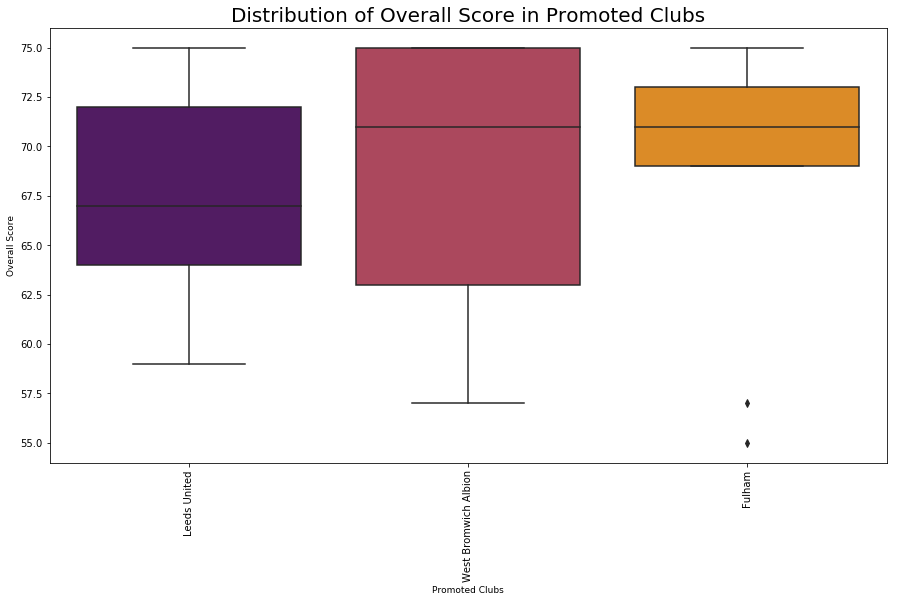

In [9]:
# Promoted Club Comparison
promoted_clubs = ('Fulham', 'West Bromwich Albion', 'Leeds United')

data_clubs = data.loc[data['club'].isin(promoted_clubs) & data['overall']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_clubs['club'], y = data_clubs['overall'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Promoted Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Promoted Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In the Premier League, clubs that do not get relegated earn at least £104M (€115.4M) in league payments (https://www.premierleague.com/news/1225126). While West Brom's median is the same as Fulham's, Fulham has the closest distribution of Overall ratings of the three promoted clubs. Fulham thus has a higher overall quality squad than that of Leeds United, meaning that Leeds will need to invest in players that can help them stay up.

# We'll Be Rightback


In [10]:
# Position Salary & Transfer Value Check
data[['best_position','wage_eur']].groupby('best_position').mean()

,wage_eur
best_position,
CAM,10641.361257
CB,9293.801392
CDM,9735.252809
CF,28646.017699
CM,10163.702690
GK,6667.976424
LB,8158.864160
LM,8559.580553
LW,14037.037037


Assuming the owner will want to keep half of the payments for facilities, staff, and repairs, we will operate on a €57.7M transfer & wage budget to find a rightback and a striker. 

On average, strikers cost roughly €1,695 more a week than rightbacks. It may be more cost-efficient for Leeds to look for a rightback first, but is it the right call? We'll verify via Machine Learning.

In [11]:
# Verifying with Machine Learning
# Part 1: Additional cleaning to focus on defenders & prep for machine learning
data.replace(to_replace='RB', value=1.0, inplace=True)
data.replace(to_replace='CAM', value=2.0, inplace=True)
data.replace(to_replace='CB', value=3.0, inplace=True)
data.replace(to_replace='CDM', value=4.0, inplace=True)
data.replace(to_replace='CF', value=5.0, inplace=True)
data.replace(to_replace='CM', value=6.0, inplace=True)
data.replace(to_replace='GK', value=7.0, inplace=True)
data.replace(to_replace='LB', value=8.0, inplace=True)
data.replace(to_replace='LM', value=9.0, inplace=True)
data.replace(to_replace='LW', value=10.0, inplace=True)
data.replace(to_replace='LWB', value=11.0, inplace=True)
data.replace(to_replace='RB', value=12.0, inplace=True)
data.replace(to_replace='RM', value=13.0, inplace=True)
data.replace(to_replace='RW', value=14.0, inplace=True)
data.replace(to_replace='RWB', value=15.0, inplace=True)
data.replace(to_replace='ST', value=16.0, inplace=True)
data.drop(['short_name','nationality','club','value_eur','wage_eur','player_positions','work_rate','release_clause_eur','team_position','loaned_from','contract_valid_until'], axis=1, inplace=True)
data.head(3)

,age,overall,potential,international_reputation,pace,shooting,passing,dribbling,defending,physic,best_position
0,32,94,94,5,87.0,92.0,92.0,96.0,39.0,66.0,14.0
1,34,93,93,5,90.0,93.0,82.0,89.0,35.0,78.0,16.0
2,27,92,92,5,91.0,85.0,87.0,95.0,32.0,58.0,10.0


In [12]:
#Part 2: Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [13]:
X = data.iloc[:, 0:12]
X.head()

,age,overall,potential,international_reputation,pace,shooting,passing,dribbling,defending,physic,best_position
0,32,94,94,5,87.0,92.0,92.0,96.0,39.0,66.0,14.0
1,34,93,93,5,90.0,93.0,82.0,89.0,35.0,78.0,16.0
2,27,92,92,5,91.0,85.0,87.0,95.0,32.0,58.0,10.0
3,26,91,93,3,0.0,0.0,0.0,0.0,0.0,0.0,7.0
4,28,91,91,4,91.0,83.0,86.0,94.0,35.0,66.0,10.0


In [14]:
y = data.iloc[:, -1]
y.head()  

0    14.0
1    16.0
2    10.0
3     7.0
4    10.0
Name: best_position, dtype: float64

In [15]:
# Part 3: Split Data (30% dataset as testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
from sklearn import metrics
model.predict(X_test)
y_pred = model.predict(X_test)
data.best_position.head()

0    14.0
1    16.0
2    10.0
3     7.0
4    10.0
Name: best_position, dtype: float64

In [17]:
# target features
feature_cols = ['age','overall','pace', 'shooting', 'passing','dribbling','defending','physic']

X = data[feature_cols]

# Tips
y = data.best_position

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# model fit
model.fit(X_train, y_train)

# test set predictions
y_pred = model.predict(X_test)

# rmse
print("root of mean squared error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# mean absolute error
print("mean absolute error: ", metrics.mean_squared_error(y_test, y_pred))

root of mean squared error:  3.0967794567345233
mean absolute error:  9.59004300365297


In the model above, it states that RWs (14) are the best positions to invest in. This prediction, however is false based on its rmse of 3.09. As such, we should proceed to go for RBs.

If the club prefers to pick up a good permanent player, we should use the following calculation:

In [20]:
df = pd.read_csv('players_20.csv')

df['best_position'] = df['player_positions'].str.split(',').str[0]

In [21]:
df_rb=df[df.best_position.str.contains('RB',case=False)]

In [25]:
df_cheap=df_rb[df_rb['value_eur']<19250000]
df_cheapRB_top10=df_cheap.sort_values(by='overall',ascending=False).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

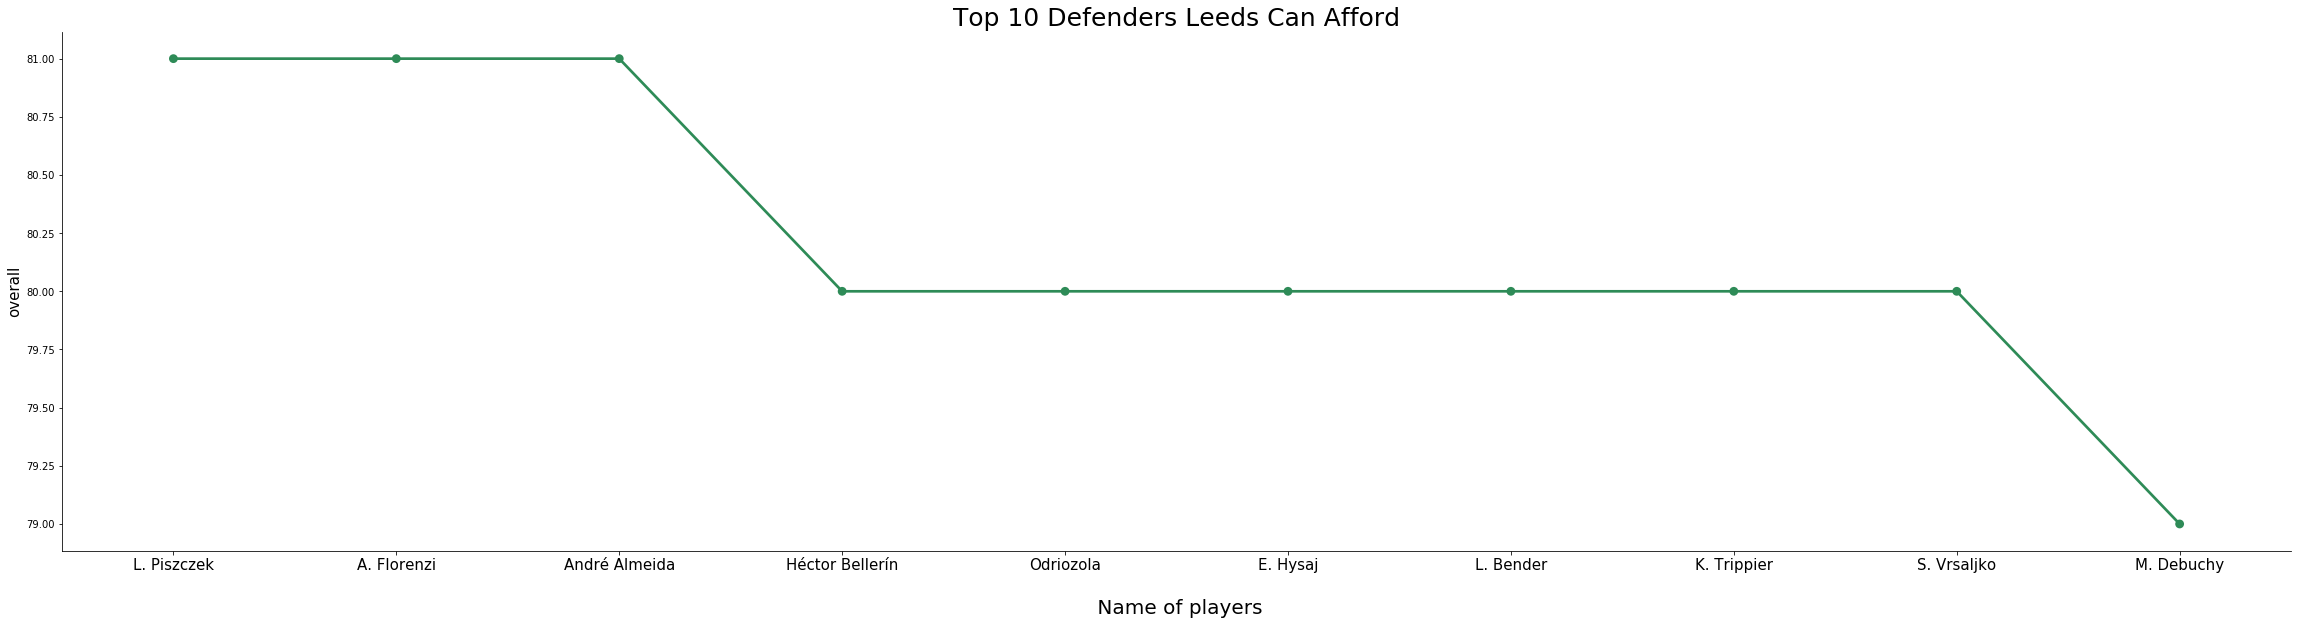

In [26]:
sns.catplot('short_name','overall',data=df_cheapRB_top10,kind='point',height=8,aspect=4,color='seagreen')
plt.xlabel('\n Name of players',size=20)

plt.ylabel('overall',size=15)
plt.title('Top 10 Defenders Leeds Can Afford',size=25)
plt.xticks(size=15)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

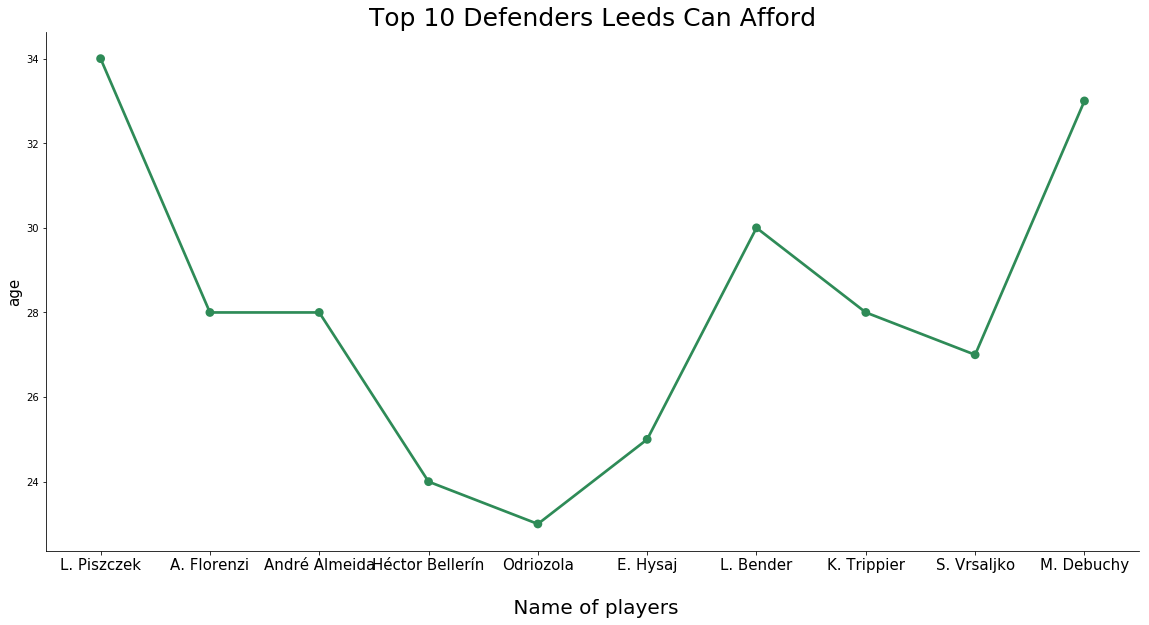

In [27]:
sns.catplot('short_name','age',data=df_cheapRB_top10,kind='point',height=8,aspect=2,color='seagreen')
plt.xlabel('\n Name of players',size=20)

plt.ylabel('age',size=15)
plt.title('Top 10 Defenders Leeds Can Afford',size=25)
plt.xticks(size=15)

Using the above analysis, we can see the top 10 rightbacks Leeds United can afford. While Leeds should look to provide their young squad with veterans, the owner will likely want players who can play for years to come. By providing an age cap of 30 years, Real Madrid's Álvaro Odriozola stands out for being a defensive rock that will also be affordable for Leeds United.

# Going on Strike

Having found potential targets for Leeds United's defensive line, we can now turn our direction to strikers.

In [28]:
df = pd.read_csv('players_20.csv')
df.columns = ['sofifa_id','player_url','short_name','long_name','age','dob','height_cm','weight_kg','nationality',
                'club','overall','potential','value_eur','wage_eur','player_positions','preferred_foot',
                'international_reputation','weak_foot','skill_moves','work_rate','body_type','real_face',
                'release_clause_eur','player_tags','team_position','team_jersey_number','loaned_from','joined',
                'contract_valid_until','nation_position','nation_jersey_number','pace','shooting','passing','dribbling','defending','physic',
                'gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning','player_traits','attacking_crossing','attacking_finishing','attacking_heading_accuracy',
                'attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy',
                'skill_long_passing','skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility',
                'movement_reactions','movement_balance','power_shot_power','power_jumping','power_stamina','power_strength',
                'power_long_shots','mentality_aggression','mentality_interceptions','mentality_positioning','mentality_vision',
                'mentality_penalties','mentality_composure','defending_marking','defending_standing_tackle',
                'defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking',
                'goalkeeping_positioning','goalkeeping_reflexes',
                'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

In [29]:
df.drop(['sofifa_id','player_url','long_name','dob','height_cm','weight_kg', 'preferred_foot', 'weak_foot','skill_moves', 'gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning','body_type','real_face','player_tags','team_jersey_number','joined','nation_position','nation_jersey_number',
           'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb',
                'goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking',
                'goalkeeping_positioning','goalkeeping_reflexes','player_traits'], axis=1, inplace=True)

df['release_clause_eur'].fillna('0', inplace = True)
df['team_position'].fillna('ST', inplace = True)
df['contract_valid_until'].fillna(2020, inplace = True)
df['loaned_from'].fillna('None', inplace = True)
df.fillna(0, inplace = True)

df['best_position'] = df['player_positions'].str.split(',').str[0]
pd.set_option('display.max_columns', None)

In [30]:
#Filtering for Patrick Bamford
def player(x):
    return df[df['short_name'] == x][['short_name','age','best_position', 'overall','pace','shooting','passing','dribbling','defending','physic','attacking_crossing','attacking_finishing','attacking_heading_accuracy',
                'attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy',
                'skill_long_passing','skill_ball_control','movement_acceleration','movement_sprint_speed','movement_agility',
                'movement_reactions','movement_balance','power_shot_power','power_jumping','power_stamina','power_strength',
                'power_long_shots','mentality_aggression','mentality_interceptions','mentality_positioning','mentality_vision',
                'mentality_penalties','mentality_composure','defending_marking','defending_standing_tackle',
                'defending_sliding_tackle']]

player('P. Bamford')

,short_name,age,best_position,overall,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
3486,P. Bamford,25,ST,72,71.0,69.0,63.0,71.0,35.0,68.0,58,72,69,67,60,71,67,59,60,74,72,70,70,68,62,71,63,75,70,62,56,54,75,62,69,72,28,23,18


Patrick Bamford, Leeds' current starting striker, struggles with reactions, vision, short passing, and finishing, all of which are critical for success in the Premier League. Adding a striker who's an upgrade in these fields will thus be helpful for Leeds.

In [31]:
data_PB=df[df.best_position.str.contains('ST',case=False)]

PB_replace1=data_PB[data_PB['attacking_short_passing']>67]
PB_replace2=PB_replace1[PB_replace1['mentality_vision']>62]
PB_replace3=PB_replace2[PB_replace2['movement_reactions']>68]
PB_replace4=PB_replace3[PB_replace3['attacking_finishing']>72]
PB_replace5=PB_replace4[PB_replace4['age']<30]
PB_replace6=PB_replace5[PB_replace5['value_eur']<19250000]

PB_replace_top10=PB_replace6.sort_values(by='overall',ascending=False).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

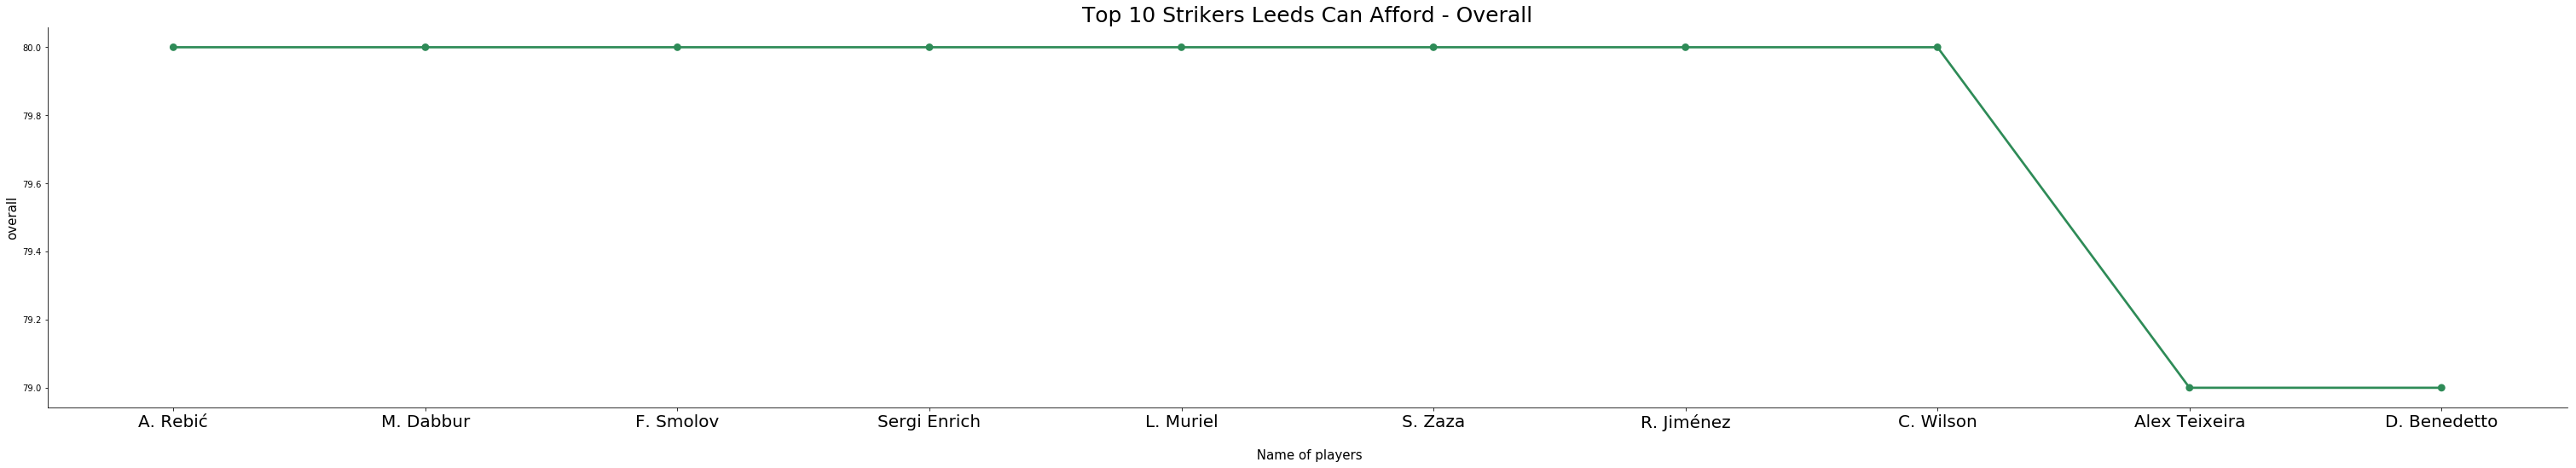

In [32]:
sns.catplot('short_name','overall',data=PB_replace_top10,kind='point',height=7,aspect=6,color='seagreen')
plt.xlabel('\n Name of players',size=15)

plt.ylabel('overall',size=15)
plt.title('Top 10 Strikers Leeds Can Afford - Overall',size=25)
plt.xticks(size=20)

8 of the 10 potential replacements all share an overall attribute of 80. To ensure Bamford's replacement is a long-term solution, we'll break the tie by age.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

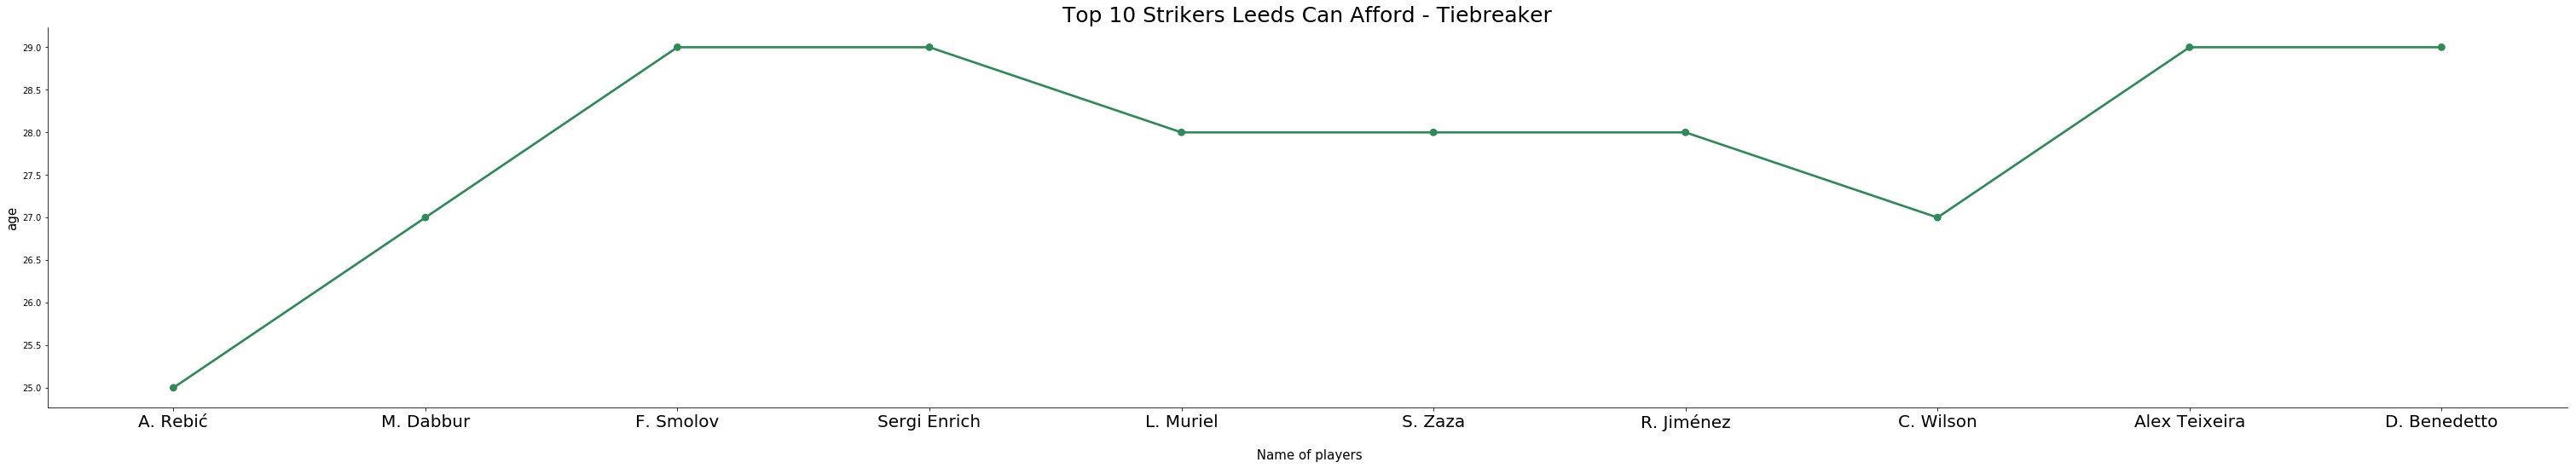

In [33]:
sns.catplot('short_name','age',data=PB_replace_top10,kind='point',height=7,aspect=6,color='seagreen')
plt.xlabel('\n Name of players',size=15)

plt.ylabel('age',size=15)
plt.title('Top 10 Strikers Leeds Can Afford - Tiebreaker',size=25)
plt.xticks(size=20)

Strikers are a highly prized commodity, and successful goal scorers can get picked up quickly by larger clubs with larger budgets. Leeds will need multiple options, but Eintracht Frankfurt's Ante Rebic should be their priority target. Rebic may currently be on loan at AC Milan, but the right offer could convince Frankfurt to cancel the loan and send him to Elland Road on a permanent deal instead. 

If Rebic doesn't join Leeds, Moanes Dabbur and Callum Wilson serve as viable alternatives. Wilson, in particular, has experience playing in the Premier League for recently relegated AFC Bournemouth. Should a Rebic transfer fall through, Leeds can take advantage of Bournemouth's relegation to acquire their top striker without breaking the bank. 